In [16]:
import os
import seaborn as sns
import numpy as np
from matplotlib.pyplot import imread

In [17]:
cd

/home/msc1


In [18]:
cd Desktop/Tensorflow-Object-Detection-API/Base/v1/object_detection

/home/msc1/Desktop/Tensorflow-Object-Detection-API/Base/v1/object_detection


In [19]:
dim1 = []
dim2 = []
for image_filename in os.listdir('./images'):
 name, ext = os.path.splitext(image_filename)
 try:
    if not ext == '.xml':
        img = imread('./images/'+image_filename)
        d1,d2,color = img.shape
        dim1.append(d1)
        dim2.append(d2)

 except:
     print(image_filename)
     continue

test
cleaned
train


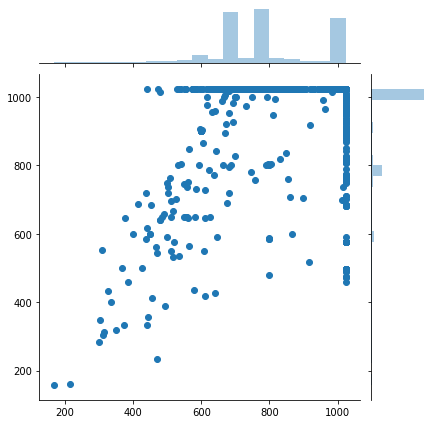

In [20]:
sns.jointplot(dim1,dim2)

In [21]:
np.mean(dim1)

788.5209150326798

In [22]:
print('Min:', np.min(dim1))
print('Max:', np.max(dim1))

Min: 168
Max: 1024


In [23]:
np.mean(dim2)

938.7718954248367

In [24]:
print('Min:', np.min(dim2))
print('Max:', np.max(dim2))

Min: 158
Max: 1024


### pre-processing my xml 

In [25]:
###converting xml files to csv
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET


def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        print(xml_file)
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     float(root.find('size')[0].text),
                     float(root.find('size')[1].text),
                     member[0].text,
                     float(member[4][0].text),
                     float(member[4][2].text),
                     float(member[4][1].text),
                     float(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df


def main():
    for directory in ['train','test']:
        image_path = os.path.join(os.getcwd(), 'images/{}'.format(directory))
        print(image_path)
        xml_df = xml_to_csv(image_path)
        xml_df.to_csv('data/{}_labels.csv'.format(directory), index=None)
        print('Successfully converted xml to csv.')

main()

/home/msc1/Desktop/Tensorflow-Object-Detection-API/Base/v1/object_detection/images/train
/home/msc1/Desktop/Tensorflow-Object-Detection-API/Base/v1/object_detection/images/train/picapica415.xml
/home/msc1/Desktop/Tensorflow-Object-Detection-API/Base/v1/object_detection/images/train/periparusater284.xml
/home/msc1/Desktop/Tensorflow-Object-Detection-API/Base/v1/object_detection/images/train/picapica376.xml
/home/msc1/Desktop/Tensorflow-Object-Detection-API/Base/v1/object_detection/images/train/picapica290.xml
/home/msc1/Desktop/Tensorflow-Object-Detection-API/Base/v1/object_detection/images/train/picapica299.xml
/home/msc1/Desktop/Tensorflow-Object-Detection-API/Base/v1/object_detection/images/train/periparusater492.xml
/home/msc1/Desktop/Tensorflow-Object-Detection-API/Base/v1/object_detection/images/train/periparusater25.xml
/home/msc1/Desktop/Tensorflow-Object-Detection-API/Base/v1/object_detection/images/train/ErithacusRubecula0034.xml
/home/msc1/Desktop/Tensorflow-Object-Detection-